In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
import pickle

In [5]:
df = pd.read_csv("diabetes.csv")

In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
def null_values(dataset):
    for keys, values in dict(dataset.isna().sum()).items():
        if values!=0:
            print(keys,values)

In [8]:
null_values(df)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


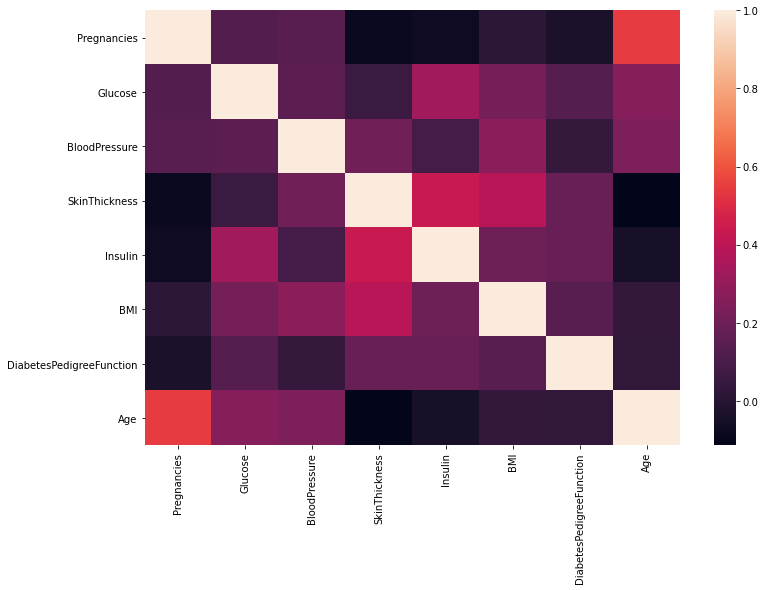

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(columns="Outcome").corr())
plt.show()

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


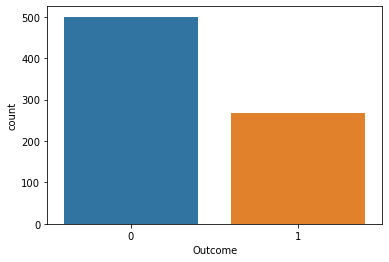

In [11]:
sns.countplot(df["Outcome"])
plt.show()

In [12]:
X = df.drop(columns="Outcome").values
y = df["Outcome"].values

In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0, test_size=0.2)

In [14]:
pipe = Pipeline([("scale", StandardScaler()), ("model", KNeighborsClassifier())])

In [15]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()), ('model', KNeighborsClassifier())])

In [16]:
pipe.score(X_train, y_train)

0.8110749185667753

In [17]:
pipe.score(X_valid, y_valid)

0.7987012987012987

In [18]:
pickle.dump(pipe, open("model_diabetes.pkl", "wb"))

In [18]:
model = pickle.load(open("model_diabetes.pkl", "rb"))

In [19]:
model.score(X_train, y_train)

0.8110749185667753

In [20]:
model.score(X_valid, y_valid)

0.7987012987012987